In [1]:
# Importing
import pandas as pd
import numpy as np
import os as os
import matplotlib as plt
from matplotlib.pyplot import boxplot
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression

In [2]:
os.chdir("C:/Users/moric/Downloads")

In [3]:
filepath = 'Hospital2.txt'
hf = pd.read_csv(filepath)

In [4]:
filepath = 'Hospital1.txt'
df = pd.read_csv(filepath)

In [5]:
print(df)

    PatientID   Readmission   StaffSatisfaction   CleanlinessSatisfaction  \
0         101             1                   4                         5   
1         102             0                   3                         2   
2         103             1                   5                         4   
3         104             0                   5                         3   
4         105             1                   4                         5   
..        ...           ...                 ...                       ...   
69        170             0                   3                         3   
70        171             1                   4                         5   
71        172             0                   2                         3   
72        173             1                   3                         4   
73        174             1                   3                         3   

     FoodSatisfaction   ComfortSatisfaction   CommunicationSatisfaction  
0

In [6]:
print(hf)

    PatientID   Readmission   StaffSatisfaction   CleanlinessSatisfaction  \
0         101             1                   4                         5   
1         102             0                   3                         2   
2         103             1                   5                         4   
3         104             0                   5                         3   
4         105             1                   4                         5   
5         106             1                   2                         3   
6         107             0                   3                         2   
7         108             0                   5                         5   
8         109             1                   4                         4   
9         110             0                   3                         3   
10        111             1                   4                         5   
11        112             0                   2                         3   

In [7]:
# Calculating Statistics for Hospital1
num_readmitted = np.sum(df[' Readmission'])
satisfaction_staff = np.mean(df[' StaffSatisfaction'])
satisfaction_cleanliness = np.mean(df[' CleanlinessSatisfaction'])
satisfaction_food = np.mean(df[' FoodSatisfaction'])
satisfaction_comfort = np.mean(df[' ComfortSatisfaction'])
satisfaction_communication = np.mean(df[' CommunicationSatisfaction'])

In [8]:
# Calculating Statistics for Hospital2
num_readmitted2 = np.sum(hf[' Readmission'])
satisfaction_staff2 = np.mean(hf[' StaffSatisfaction'])
satisfaction_cleanliness2 = np.mean(hf[' CleanlinessSatisfaction'])
satisfaction_food2 = np.mean(hf[' FoodSatisfaction'])
satisfaction_comfort2 = np.mean(hf[' ComfortSatisfaction'])
satisfaction_communication2 = np.mean(hf[' CommunicationSatisfaction'])

In [9]:
# Print out descriptive Statisitcs for Hospital1
print(f"Number of patients readmitted: {num_readmitted}.")
print(f"Average staff satisifaction: {satisfaction_staff}.")
print(f"Average cleanliness satisfaction: {satisfaction_cleanliness}.")
print(f"Average food satisifaction: {satisfaction_food}.")
print(f"Average comfort satisifaction: {satisfaction_comfort}.")
print(f"Average communication satisifaction: {satisfaction_communication}.")

Number of patients readmitted: 38.
Average staff satisifaction: 3.5135135135135136.
Average cleanliness satisfaction: 3.608108108108108.
Average food satisifaction: 3.5135135135135136.
Average comfort satisifaction: 3.7162162162162162.
Average communication satisifaction: 3.7027027027027026.


In [10]:
# Print out descriptive Statisitcs for Hospital2
print(f"Number of patients readmitted: {num_readmitted2}.")
print(f"Average staff satisifaction: {satisfaction_staff2}.")
print(f"Average cleanliness satisfaction: {satisfaction_cleanliness2}.")
print(f"Average food satisifaction: {satisfaction_food2}.")
print(f"Average comfort satisifaction: {satisfaction_comfort2}.")
print(f"Average communication satisifaction: {satisfaction_communication2}.")

Number of patients readmitted: 29.
Average staff satisifaction: 3.526315789473684.
Average cleanliness satisfaction: 3.6315789473684212.
Average food satisifaction: 3.56140350877193.
Average comfort satisifaction: 3.754385964912281.
Average communication satisifaction: 3.719298245614035.


{'whiskers': [<matplotlib.lines.Line2D at 0x1faf701c190>,
 'caps': [<matplotlib.lines.Line2D at 0x1faf89c67d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1faf8aafc90>],
 'medians': [<matplotlib.lines.Line2D at 0x1faf8abfa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1faf8aafb50>],
 'means': []}

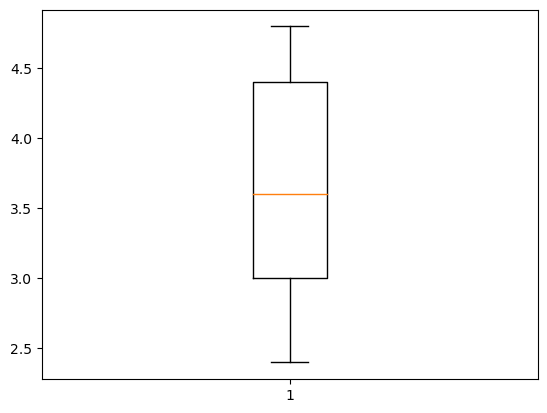

In [11]:
# Calculate overall satisfaction for Hospital1
df['OverallSatisfaction'] = df[[' StaffSatisfaction', ' CleanlinessSatisfaction', ' FoodSatisfaction',' ComfortSatisfaction',' CommunicationSatisfaction']].mean(axis=1)
boxplot(df['OverallSatisfaction'], showfliers=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x1faf8b8c0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1faf8b8d9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1faf8b7f490>],
 'medians': [<matplotlib.lines.Line2D at 0x1faf8b8efd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1faf8b8d750>],
 'means': []}

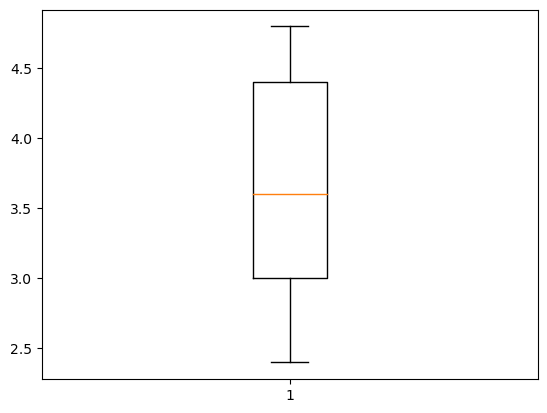

In [12]:
# Calculate overall satisfaction Hospital2
hf['OverallSatisfaction'] = hf[[' StaffSatisfaction', ' CleanlinessSatisfaction', ' FoodSatisfaction',' ComfortSatisfaction',' CommunicationSatisfaction']].mean(axis=1)
boxplot(hf['OverallSatisfaction'], showfliers = True)

In [13]:
# Logistic Regression model, Hospital1
x = df['OverallSatisfaction'].values.reshape(-1,1)
y = df[' Readmission']

log_reg1 = LogisticRegression().fit(x, y)

In [14]:
# Logistic Regression model, Hospital2
x = hf['OverallSatisfaction'].values.reshape(-1,1)
y = hf[' Readmission']

log_reg2 = LogisticRegression().fit(x, y)

In [15]:
# Correlation results for Hospital1
correlation_coefficient = log_reg1.coef_[0][0]

if correlation_coefficient > 0: 
    print("Logistic regression results indicated a: ")
    if correlation_coefficient > 0.5:
        print("Moderation correlation.")
    elif correlation_coefficient > 0.7:
        print("Strong Correlation")
    else:
        print("Weak Correlation")

else:
    print("Logistic regression results indicated: ")
    print("No Correlation")


Logistic regression results indicated a: 
Weak Correlation


In [16]:
# Correlation results for Hospital2
correlation_coefficient = log_reg2.coef_[0][0]

if correlation_coefficient > 0: 
    print("Logistic regression results indicated a: ")
    if correlation_coefficient > 0.5:
        print("Moderation correlation.")
    elif correlation_coefficient > 0.7:
        print("Strong Correlation")
    else:
        print("Weak Correlation")

else:
    print("Logistic regression results indicated: ")
    print("No Correlation")

Logistic regression results indicated a: 
Weak Correlation


(2.0, 5.0)

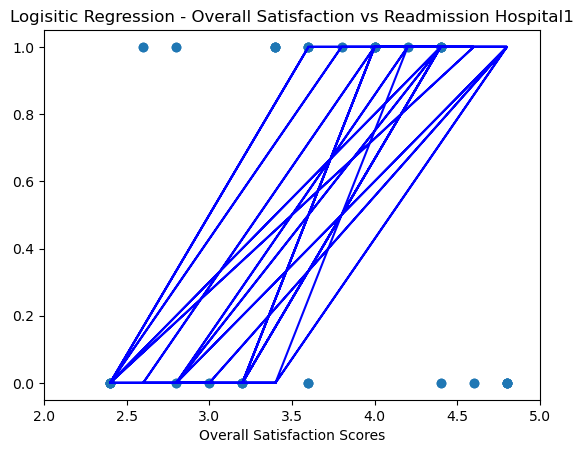

In [17]:
# plot the data for Hospital1
plt.pyplot.scatter(x,y)
plt.pyplot.xlabel('Overall Satisfaction Scores')
plt.pyplot.title('Logisitic Regression - Overall Satisfaction vs Readmission Hospital1')
plt.pyplot.plot(x, log_reg1.predict(x), color = 'blue')
plt.pyplot.xlim(2,5)

(2.0, 5.0)

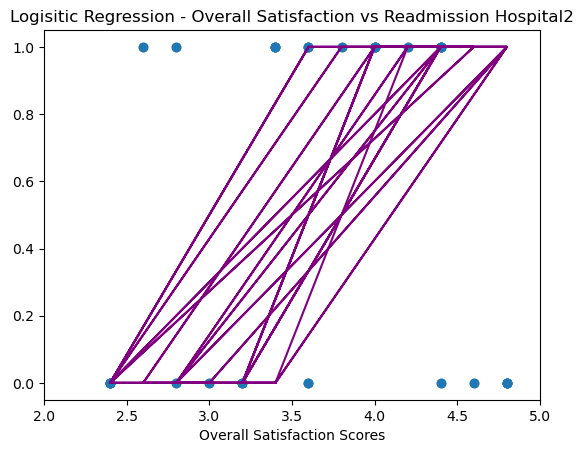

In [18]:
# plot the data for Hospital2
plt.pyplot.scatter(x,y)
plt.pyplot.xlabel('Overall Satisfaction Scores')
plt.pyplot.title('Logisitic Regression - Overall Satisfaction vs Readmission Hospital2')
plt.pyplot.plot(x, log_reg2.predict(x), color = 'purple')
plt.pyplot.xlim(2,5)

In [26]:
# Comparison Between Both Data Sets
print(f"The two hospitals had a weak correlation. Hospital1 had a higher readmission rate than Hospital2. Hospital2 had a higher overall satisfaction score than Hospital1.")


The two hospitals had a weak correlation. Hospital1 had a higher readmission rate than Hospital2. Hospital2 had a higher overall satisfaction score than Hospital1.
